In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("hepatitis.csv")

In [3]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [4]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [5]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


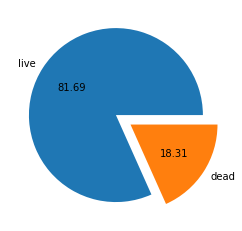

In [6]:
x=df.loc[df['class']==2].count()[0]
y=df.loc[df['class']==1].count()[0]
z=[x,y]
l=['live','dead']
plt.pie(z,labels=l,autopct='%1.2f',explode=[0,0.2])
plt.show()

In [7]:
df2=df.drop(['class','sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palable','spiders','ascites','varices','histology'],axis=1)

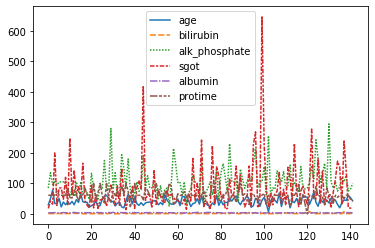

In [8]:
sns.lineplot(data=df2)

In [9]:
df['status']=df['class']
x=df.drop(['age','sex','class','status'],axis=1)
y=df['status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
x_train

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
127,2,2,2,2,2,2,1,2,1,2,1,1.6,130,140,3.50,56,2
55,1,2,1,1,2,2,2,1,2,2,2,1.0,85,75,3.81,61,1
83,1,2,1,1,1,1,1,2,2,2,2,0.6,76,18,4.40,84,2
140,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.10,48,2
106,1,2,2,2,2,2,2,2,2,2,2,1.1,141,75,3.30,61,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,1,1,2,2,2,2,2,2,2,1.0,55,45,4.10,56,1
8,2,2,2,2,2,2,2,2,2,2,2,1.0,105,120,3.90,61,1
128,2,2,1,1,2,2,1,2,1,1,1,1.0,166,30,2.60,31,2
124,1,2,2,2,2,2,1,2,2,2,2,0.4,243,49,3.80,90,2


In [11]:
y_train

127    2
55     2
83     2
140    2
106    2
      ..
70     2
8      2
128    1
124    1
77     2
Name: status, Length: 113, dtype: int64

In [12]:
dcf= DecisionTreeClassifier()
dcf.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
dcf.score(x_test,y_test)

1.0

In [14]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [15]:
r.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
r.score(x_test,r.predict(x_test))

1.0

In [17]:
import pickle
with open('model_h','wb') as files:
    pickle.dump(dcf,files)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
print("Test Accuracy: {:.2f}%".format(dcf.score(x_test, y_test) * 100))

Test Accuracy: 86.05%


In [21]:
import pickle
with open('model_h1','wb') as files:
    pickle.dump(r,files)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb=GaussianNB()
nb.fit(x_train,y_train)
status=nb.predict(x_test)

In [24]:
accuracy_score(nb.predict(x_test),y_test)

0.8421052631578947

In [25]:
import pickle
with open('model_h2','wb') as files:
    pickle.dump(nb,files)

In [26]:
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,status
0,2,30,2,1,2,2,2,2,1,2,...,2,2,2,1.0,85,18,4.0,61,1,2
1,2,50,1,1,2,1,2,2,1,2,...,2,2,2,0.9,135,42,3.5,61,1,2
2,2,78,1,2,2,1,2,2,2,2,...,2,2,2,0.7,96,32,4.0,61,1,2
3,2,34,1,2,2,2,2,2,2,2,...,2,2,2,1.0,105,200,4.0,61,1,2
4,2,34,1,2,2,2,2,2,2,2,...,2,2,2,0.9,95,28,4.0,75,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,...,1,1,1,7.6,105,242,3.3,50,2,1
138,2,44,1,2,2,1,2,2,2,1,...,2,2,2,0.9,126,142,4.3,61,2,2
139,2,61,1,1,2,1,1,2,1,2,...,1,2,2,0.8,75,20,4.1,61,2,2
140,2,53,2,1,2,1,2,2,2,2,...,1,2,1,1.5,81,19,4.1,48,2,2
